### Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# image size
img_height, img_width = 32, 32
# define batch size
batch_size=64

### Load dataset

In [ ]:
!cp /content/drive/MyDrive/Computer_Vision/DataSet/Dataset.zip .

In [ ]:
!unzip Dataset.zip -d dataset

Get training data and val data

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './dataset',
  validation_split=0.3,
  subset="training",
  color_mode='grayscale',
  seed=150,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3042 files belonging to 3 classes.
Using 2130 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './dataset',
  validation_split=0.3,
  subset="validation",
  color_mode='grayscale',
  seed=150,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3042 files belonging to 3 classes.
Using 912 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C']


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

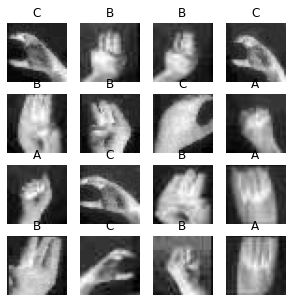

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8").squeeze(), cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis("off")
  break

### Build CNN Model

In [ ]:
model = Sequential([
    # 32 convolutional filters of size 3 x 3, 'relu activation', padding = same (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1), padding='same'),
    # 2 X 2 max pooling layer (https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Dropout with probability 20%. Useful to avoid overfitting. (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    # Flatten the last image features before liking to a FFN (https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D)
    layers.GlobalAvgPool2D(),
    # A simple fully connected layer with a 'relu' activation
    layers.Dense(64, activation='relu'),
    # A simple fully connected output layer with no activation
    layers.Dense(3)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
34/34 [==============================] - 34s 39ms/step - loss: 5.2195 - accuracy: 0.3310 - val_loss: 1.1047 - val_accuracy: 0.3333
Epoch 2/10
34/34 [==============================] - 0s 7ms/step - loss: 1.0965 - accuracy: 0.3635 - val_loss: 1.0314 - val_accuracy: 0.3772
Epoch 3/10
34/34 [==============================] - 0s 6ms/step - loss: 1.0195 - accuracy: 0.4855 - val_loss: 0.8735 - val_accuracy: 0.5746
Epoch 4/10
34/34 [==============================] - 0s 6ms/step - loss: 0.8717 - accuracy: 0.5934 - val_loss: 0.6989 - val_accuracy: 0.8103
Epoch 5/10
34/34 [==============================] - 0s 7ms/step - loss: 0.7003 - accuracy: 0.6921 - val_loss: 0.6277 - val_accuracy: 0.6941
Epoch 6/10
34/34 [==============================] - 0s 6ms/step - loss: 0.6008 - accuracy: 0.7401 - val_loss: 0.4670 - val_accuracy: 0.7807
Epoch 7/10
34/34 [==============================] - 0s 6ms/step - loss: 0.4708 - accuracy: 0.8246 - val_loss: 0.3239 - val_accuracy: 0.9112
Epoch 8/10
34/34 [

In [ ]:
score = model.evaluate(val_ds)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

15/15 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.9693
Validation loss: 0.11908604949712753
Validation accuracy: 0.969298243522644


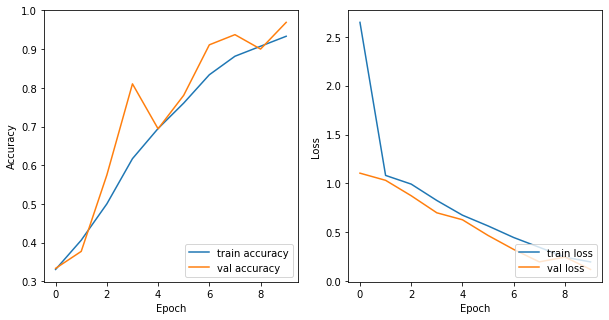

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

### Save Model


In [ ]:
model_json = model.to_json()
with open("CNNmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("CNNmodel_weights.h5")
print("Saved model to disk") 

Saved model to disk
